# Exercise W3 L6 Part 2

In [5]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf

# Load data

In [2]:
ch4 = pandas.read_table('../Data/ch4_mm_gl.txt', delim_whitespace=True)

## Dates

In [3]:
dates = []
for index, row in ch4.iterrows():
    dates.append(f'{int(row.year)}-{int(row.month)}')
dates = pandas.to_datetime(dates)
ch4['date'] = dates
ch4.set_index('date', inplace=True)
ch4.head()

,year,month,decimal,average,average_unc,trend,trend_unc
date,,,,,,,
1983-07-01,1983,7,1983.542,1625.9,2.3,1634.8,1.5
1983-08-01,1983,8,1983.625,1628.1,2.9,1635.3,1.4
1983-09-01,1983,9,1983.708,1638.4,2.3,1635.9,1.3
1983-10-01,1983,10,1983.792,1644.8,1.4,1636.5,1.2
1983-11-01,1983,11,1983.875,1642.6,0.8,1637.2,1.2


# Dummy variables

In [26]:
dummy = np.zeros((len(ch4), 11), dtype=int)
for i in np.arange(11):
    for j in np.arange(len(ch4)):
        if ch4.month.values[j] == i+1:
            dummy[j,i] = 1

In [28]:
dummy.shape

(461, 11)

# Generalized fit

In [7]:
time = np.arange(len(ch4)) + 1

In [24]:
time.size

461

## Here goes nothing..

In [29]:
data = pandas.DataFrame()
data['ch4'] = ch4.average.values
data['time'] = time
dummies = []
for idum in np.arange(11):
    key = f'dum{idum}'
    dummies.append(key)
    data[key] = dummy[:,idum]

In [30]:
dummies

['dum0',
 'dum1',
 'dum2',
 'dum3',
 'dum4',
 'dum5',
 'dum6',
 'dum7',
 'dum8',
 'dum9',
 'dum10']

In [33]:
formula = "ch4 ~ dum0 + dum1 + dum2 + dum3 + dum4 + dum5 + dum6 + dum7 + dum8 + dum9 + dum10 + time"
mod1 = smf.glm(formula=formula, data=data).fit()#, family=sm.families.Binomial()).fit()

In [34]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ch4   No. Observations:                  461
Model:                            GLM   Df Residuals:                      448
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                          204.89
Method:                          IRLS   Log-Likelihood:                -1874.4
Date:                Mon, 18 Apr 2022   Deviance:                       91793.
Time:                        05:25:54   Pearson chi2:                 9.18e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1671.2283      2.588    645.806      0.000    1666.156    1676.300
dum0          -1.7825      3.284     -0.543      0.587      -8.219       4.654
dum1          -2.5861      3.284     -0.787      0.431      -9.022       3.850
dum2          -2.3107      3.284     -0.704      0.482      -8.747       4.126
dum3          -2.3432      3.284     -0.714      0.476      -8.780       4.093
dum4          -4.3336      3.284     -1.320      0.187     -10.770       2.103
dum5          -8.6792      3.284     -2.643      0.008     -15.116      -2.243
dum6         -12.8185      3.263     -3.929      0.000     -19.213      -6.424
dum7         -10.0564      3.263     -3.082      0.002     -16.451      -3.662
dum8          -3.1739      3.263     -0.973      0.331      -9.569       3.221
dum9           1.3984      3.263      0.429      0.668      -4.997       7.793
dum10          2.0655      3.263      0.633      0.527      -4.330       8.461
time           0.4457      0.005     88.953      0.000       0.436       0.455
==============================================================================
"""

In [35]:
mod1.fittedvalues

0      1658.855472
1      1662.063164
2      1669.391369
3      1674.409318
4      1675.522138
          ...     
456    1862.077862
457    1865.285554
458    1872.613759
459    1877.631708
460    1878.744528
Length: 461, dtype: float64

## Plot

<Figure size 432x288 with 0 Axes>

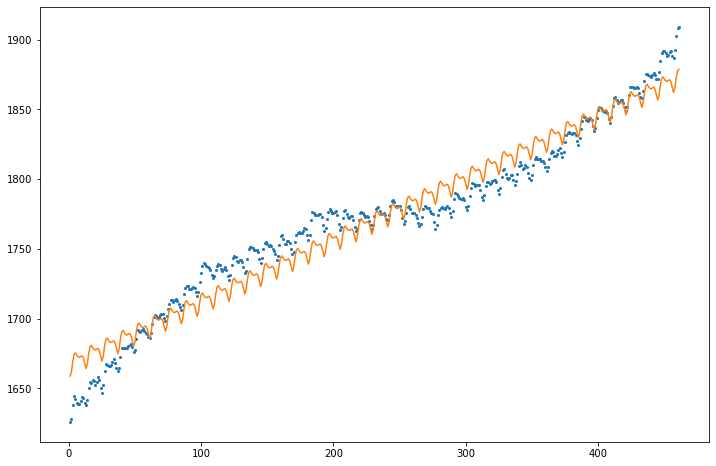

In [40]:
plt.clf()
fig = plt.figure(figsize=(12,8))
#
ax = plt.gca()
ax.plot(data['time'], data['ch4'], 'o', ms=2)
# Fit
ax.plot(data['time'], mod1.fittedvalues)
#
plt.show()

# Quadratic

In [42]:
data['time2'] = time**2

In [43]:
formula2 = "ch4 ~ dum0 + dum1 + dum2 + dum3 + dum4 + dum5 + dum6 + dum7 + dum8 + dum9 + dum10 + time + time2"
mod2 = smf.glm(formula=formula2, data=data).fit()#, family=sm.families.Binomial()).fit()

## Plot

<Figure size 432x288 with 0 Axes>

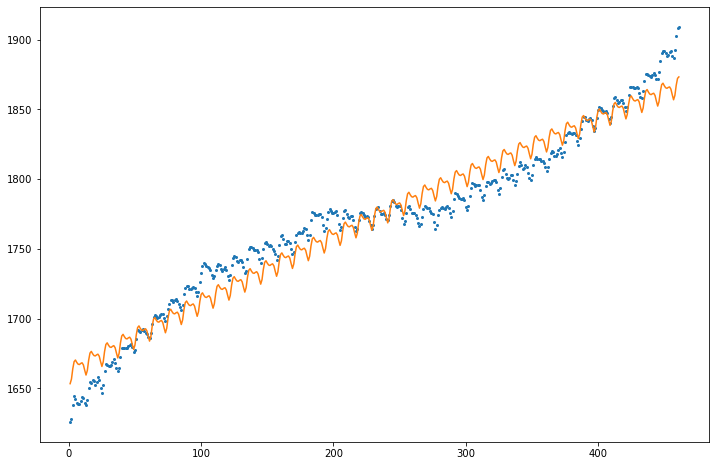

In [44]:
plt.clf()
fig = plt.figure(figsize=(12,8))
#
ax = plt.gca()
ax.plot(data['time'], data['ch4'], 'o', ms=2)
# Fit
ax.plot(data['time'], mod2.fittedvalues)
#
plt.show()

# Cubic

In [45]:
data['time3'] = time**3

In [46]:
formula3 = "ch4 ~ dum0 + dum1 + dum2 + dum3 + dum4 + dum5 + dum6 + dum7 + dum8 + dum9 + dum10 + time + time2 + time3"
mod3 = smf.glm(formula=formula3, data=data).fit()#, family=sm.families.Binomial()).fit()

## Plot

<Figure size 432x288 with 0 Axes>

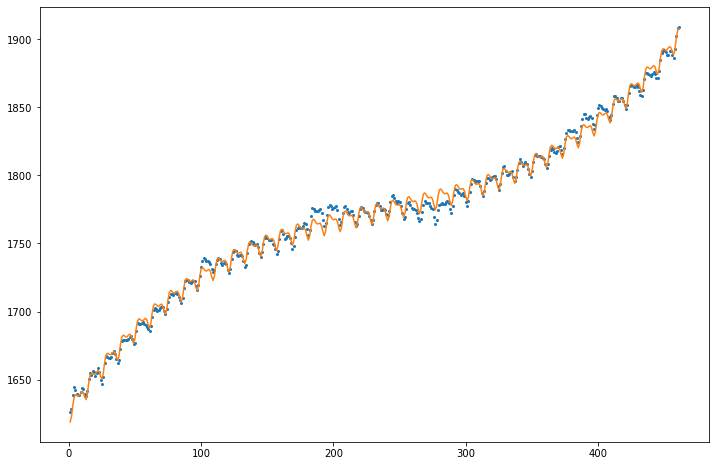

In [47]:
plt.clf()
fig = plt.figure(figsize=(12,8))
#
ax = plt.gca()
ax.plot(data['time'], data['ch4'], 'o', ms=2)
# Fit
ax.plot(data['time'], mod3.fittedvalues)
#
plt.show()

## Cubic wins!!

----

# Durbin Watson

In [48]:
resids = data.ch4 - mod3.fittedvalues

In [49]:
dw = durbin_watson(resids)
dw

0.08666982041888166

## Not independent!